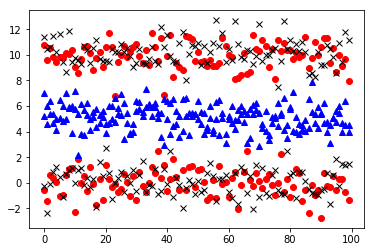

Epoch 1/20
300/300 [==============================] - 0s 519us/step - loss: 0.7291
Epoch 2/20
300/300 [==============================] - 0s 20us/step - loss: 0.1615
Epoch 3/20
300/300 [==============================] - 0s 27us/step - loss: 0.1252
Epoch 4/20
300/300 [==============================] - 0s 23us/step - loss: 0.1006
Epoch 5/20
300/300 [==============================] - 0s 20us/step - loss: 0.0869
Epoch 6/20
300/300 [==============================] - 0s 20us/step - loss: 0.0766
Epoch 7/20
300/300 [==============================] - 0s 23us/step - loss: 0.0691
Epoch 8/20
300/300 [==============================] - 0s 20us/step - loss: 0.0628
Epoch 9/20
300/300 [==============================] - 0s 20us/step - loss: 0.0581
Epoch 10/20
300/300 [==============================] - 0s 17us/step - loss: 0.0539
Epoch 11/20
300/300 [==============================] - 0s 17us/step - loss: 0.0501
Epoch 12/20
300/300 [==============================] - 0s 23us/step - loss: 0.0472
Epoch 13/20


In [36]:
# Multi-class logistic regression
# pp.118 - 123

from sklearn.utils import shuffle # 데이터를 섞기 위해서 사용 pip install --upgrade scikit-learn으로 설치 가능
import numpy as np


M=2    # 입력 데이터의 차원
K=3    # 클래스 수
n=100  # 각 클래스에 있는 데이터 수
N=n*K  # 전체 데이터 수

# 샘플 데이터 셋 생성
X1 = np.random.randn(n, M) + np.array([0, 10]) #randn은 Gaussian distribution
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.concatenate((Y1,Y2,Y3), axis=0)

import matplotlib.pyplot as plt
plt.plot(X1, 'ro', X2, 'b^', X3, 'kx')
plt.show()

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 모델 생성
model = Sequential()
model.add(Dense(input_dim=M, units=K)) # 입력차원 = M, 출력 차원 = K
model.add(Activation('softmax'))

lr = 0.1 # learing rate
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr))

minibatch_size = 50
epochs = 20
model.fit(X,Y, epochs=epochs, batch_size=minibatch_size)

# 결과를 보기 위해서 shuffle된 데이터에서 10개를 선택 후 확인
X_, Y_ = shuffle(X,Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size) 
print()
print('예측된 classes : ', classes)
prob = model.predict_proba(X_[0:10], batch_size=minibatch_size) # predict_proba의 출력은 각 클래스에 대한 확률
print('예측과 실제값 확인: ', np.argmax(model.predict(X_[0:10]), axis=1) == classes)
# argmax: axis에 해당하는 값들 중에서 가장 큰 값의 인덱스를 반환해주는 함수
#         axis=1이면 y축 기준

print('각 예측한 클래스의 확률: ')
print(prob)